## 2. Machine Learning for Regression

In [3]:
import pandas as pd
import numpy as np

## 2.2 Data Preparation

In [4]:
# data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [5]:
!wget $data

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [6]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [7]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


In [9]:
# to access just one column
# df['model_year']

#  or using dot notation
# df.model_year

In [10]:
selected_columns = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']

In [11]:
new_df = df[selected_columns]

In [12]:
new_df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB


## 2.3 EDA

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# display plot in notebook
%matplotlib inline

Looking at 'fuel_efficiency_mpg'

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

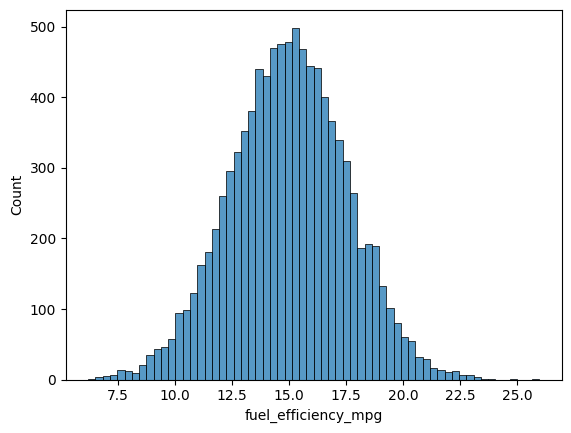

In [15]:
sns.histplot(new_df.fuel_efficiency_mpg)

In [16]:
# fuel_efficiency does not have a long tail; it has a normal distribution

In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB


In [18]:
new_df.isnull()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,True,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
9699,False,False,False,False,False
9700,False,False,False,False,False
9701,False,False,False,False,False
9702,False,False,False,False,False


In [19]:
new_df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [20]:
new_df.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


In [21]:
new_df['horsepower'].median()

np.float64(149.0)

### 2.4 Preparing and splitting the dataset

Setting up the validation framework (and shuffling)

In [22]:
# size of dataframe
len(new_df)

9704

In [23]:
# 20% (rounded to whole number) for validation and test sets
int(len(new_df) * 0.2)

1940

In [24]:
# putting all 3 (train, validation and test together)

n = len(new_df) # n is size of dataframe being used

n_val = int(n * 0.2) # n_val is size of validation dataset
n_test = int(n * 0.2) # n_test is size of test dataset
n_train = n - n_val - n_test # n_train is what is left after validation and test datasets have been taken out

In [25]:
n, n_val, n_test, n_train

(9704, 1940, 1940, 5824)

In [26]:
# check
n, n_val + n_test + n_train

(9704, 9704)

In [27]:
# splitting the dataset (new_df) into the framework
new_df_train = new_df.iloc[:n_train]
new_df_val = new_df.iloc[n_train:n_train+n_val]
new_df_test = new_df.iloc[n_train+n_val:]

In [28]:
new_df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1940 entries, 5824 to 7763
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  1940 non-null   int64  
 1   horsepower           1805 non-null   float64
 2   vehicle_weight       1940 non-null   float64
 3   model_year           1940 non-null   int64  
 4   fuel_efficiency_mpg  1940 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 75.9 KB


In [29]:
new_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1940 entries, 7764 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  1940 non-null   int64  
 1   horsepower           1808 non-null   float64
 2   vehicle_weight       1940 non-null   float64
 3   model_year           1940 non-null   int64  
 4   fuel_efficiency_mpg  1940 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 75.9 KB


In [30]:
new_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  5824 non-null   int64  
 1   horsepower           5383 non-null   float64
 2   vehicle_weight       5824 non-null   float64
 3   model_year           5824 non-null   int64  
 4   fuel_efficiency_mpg  5824 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 227.6 KB


In [31]:
# shuffling the records in the dataset
idx = np.arange(n)

In [32]:
np.random.seed(42) # for reproducibility of random shuffling
np.random.shuffle(idx)

In [33]:
new_df_train = new_df.iloc[idx[:n_train]]
new_df_val = new_df.iloc[idx[n_train:n_train+n_val]]
new_df_test = new_df.iloc[idx[n_train+n_val:]]

In [ ]:
new_df_train

In [ ]:
new_df_val

In [ ]:
new_df_test

In [37]:
len(new_df_train), len(new_df_val), len(new_df_test)

(5824, 1940, 1940)

In [38]:
# handling missing values in column 'horsepower'
new_df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [39]:
# first, filling missing values with 'O'
new_df['horsepower'].isnull().sum()

np.int64(708)

In [40]:
new_df['horsepower'].mean()

np.float64(149.65729212983547)

In [41]:
new_df['horsepower'].describe()

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

In [43]:
# fill up missing values with zero
new_df['horsepower'] = new_df['horsepower'].fillna(0, inplace=True)

/tmp/ipykernel_6310/1765693728.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['horsepower'] = new_df['horsepower'].fillna(0, inplace=True)
/tmp/ipykernel_6310/1765693728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['horsepower'] = new_df['horsepower'].fillna(0, inplace=True)
/tmp/ipykernel_6310/1765693728.py:2: Settin

In [44]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           9704 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB


In [45]:
new_df['horsepower'].isnull().sum()

np.int64(0)

In [46]:
# second, filling missing values with the 'mean'
new_df['horsepower'].fillna(new_df['horsepower'].mean())

0       159.0
1        97.0
2        78.0
3         0.0
4       140.0
        ...  
9699    164.0
9700    154.0
9701    138.0
9702    177.0
9703    140.0
Name: horsepower, Length: 9704, dtype: float64

## 2.5 Linear Regression